Muvva saichandra - W9533735


**Logistic regression**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:

# importing data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
heart_stroke=pd.read_csv('/content/drive/MyDrive/heart-stroke/train_strokes.csv')
heart_stroke.head(10)
df=heart_stroke
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [7]:
print('no of samples in dataset is :' +str(len(df.index)))

no of samples in dataset is :43400


## Analyze Data

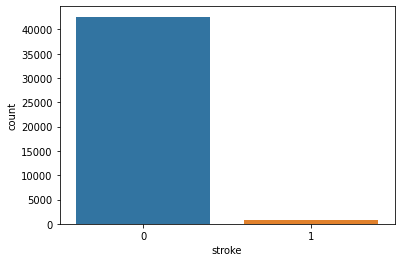

In [8]:
sns.countplot(x='stroke',data=df)

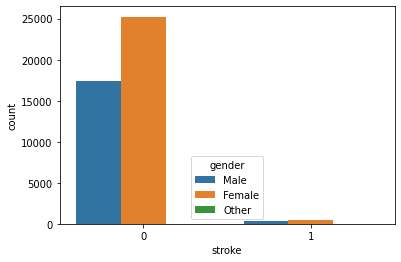

In [9]:
sns.countplot(x='stroke',hue='gender',data=df)

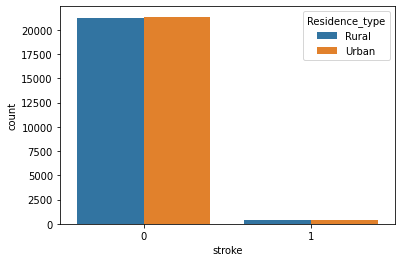

In [10]:
sns.countplot(x='stroke',hue='Residence_type',data=df)

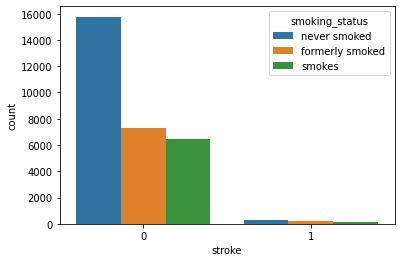

In [11]:
sns.countplot(x='stroke',hue='smoking_status',data=df)

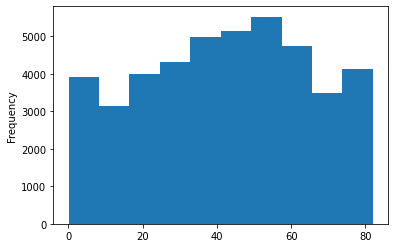

In [12]:
df['age'].plot.hist()

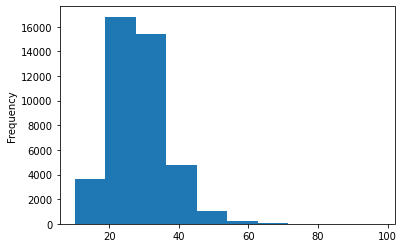

In [13]:
df['bmi'].plot.hist()

#Data Wrangling


In [14]:
df.isnull()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,False,False,False,False,False,False,False,False,False,False,False,False
43396,False,False,False,False,False,False,False,False,False,False,False,False
43397,False,False,False,False,False,False,False,False,False,False,False,False
43398,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
df.stroke.value_counts()

0    42617
1      783
Name: stroke, dtype: int64

In [16]:
df.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

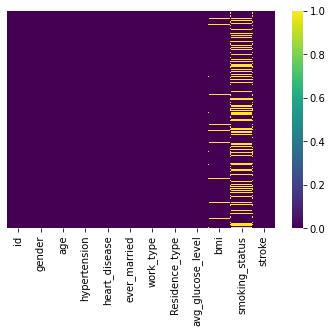

In [17]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

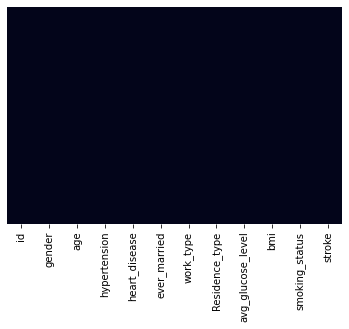

In [18]:
# removing of nan values
df.dropna(inplace=True)
sns.heatmap(heart_stroke.isnull(),yticklabels=False,cbar=False)

In [19]:
df.stroke.value_counts()

0    28524
1      548
Name: stroke, dtype: int64

In [20]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [21]:
df["gender"].values

array(['Male', 'Female', 'Female', ..., 'Female', 'Male', 'Female'],
      dtype=object)

In [22]:
df2=df[(df['gender']!= "Other")]

In [23]:
df2.gender.value_counts()

Female    17852
Male      11213
Name: gender, dtype: int64

In [24]:
gender=pd.get_dummies(df2['gender'],drop_first=True)

In [25]:
gender.head(5)

,Male
1,1
3,0
6,0
7,0
8,0


In [26]:
ever_married=pd.get_dummies(df2['ever_married'],drop_first=True)

In [27]:
ever_married.tail(5)

,Yes
43395,0
43396,1
43397,1
43398,1
43399,1


In [28]:
Residence_type=pd.get_dummies(df2['Residence_type'],drop_first=True)
Residence_type.head(5)

,Urban
1,1
3,0
6,1
7,0
8,0


In [29]:
df2

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
6,52800,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
7,41413,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
8,15266,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [30]:
df2=pd.concat([df2,gender,Residence_type,ever_married],axis=1)


In [31]:
df2

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Male,Urban,Yes
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0,1,1,1
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0,0,0,1
6,52800,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0,0,1,1
7,41413,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0,0,0,1
8,15266,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0,0,1,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0,0,1,1
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0,0,1,1
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0,1,1,1


In [32]:
df2.drop(['ever_married','gender','Residence_type'],axis=1,inplace=True)


In [33]:
df2

,id,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke,Male,Urban,Yes
1,30468,58.0,1,0,Private,87.96,39.2,never smoked,0,1,1,1
3,56543,70.0,0,0,Private,69.04,35.9,formerly smoked,0,0,0,1
6,52800,52.0,0,0,Private,77.59,17.7,formerly smoked,0,0,1,1
7,41413,75.0,0,1,Self-employed,243.53,27.0,never smoked,0,0,0,1
8,15266,32.0,0,0,Private,77.67,32.3,smokes,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,10.0,0,0,children,58.64,20.4,never smoked,0,0,1,0
43396,5450,56.0,0,0,Govt_job,213.61,55.4,formerly smoked,0,0,1,1
43397,28375,82.0,1,0,Private,91.94,28.9,formerly smoked,0,0,1,1
43398,27973,40.0,0,0,Private,99.16,33.2,never smoked,0,1,1,1


In [34]:
df2=df2.rename(columns={'Yes':'married'})


In [35]:
df2.drop(['id','work_type','smoking_status'],axis=1,inplace=True)

In [36]:
df2

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Male,Urban,married
1,58.0,1,0,87.96,39.2,0,1,1,1
3,70.0,0,0,69.04,35.9,0,0,0,1
6,52.0,0,0,77.59,17.7,0,0,1,1
7,75.0,0,1,243.53,27.0,0,0,0,1
8,32.0,0,0,77.67,32.3,0,0,0,1
...,...,...,...,...,...,...,...,...,...
43395,10.0,0,0,58.64,20.4,0,0,1,0
43396,56.0,0,0,213.61,55.4,0,0,1,1
43397,82.0,1,0,91.94,28.9,0,0,1,1
43398,40.0,0,0,99.16,33.2,0,1,1,1


In [37]:
df2.stroke.value_counts()

0    28517
1      548
Name: stroke, dtype: int64

#Train and Test data


In [38]:
X=df2.drop('stroke',axis=1)
y=df2['stroke']

In [39]:
from imblearn import under_sampling, over_sampling
X_under, y_under = under_sampling.RandomUnderSampler(0.2).fit_resample(X, y)
X_over, y_over = over_sampling.RandomOverSampler(0.2).fit_resample(X, y)
X_var, y_var = over_sampling.SMOTE(0.2).fit_resample(X, y)

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.2 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.2 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.2 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


In [40]:
X_var

,age,hypertension,heart_disease,avg_glucose_level,bmi,Male,Urban,married
0,58.000000,1,0,87.960000,39.200000,1,1,1
1,70.000000,0,0,69.040000,35.900000,0,0,1
2,52.000000,0,0,77.590000,17.700000,0,1,1
3,75.000000,0,1,243.530000,27.000000,0,0,1
4,32.000000,0,0,77.670000,32.300000,0,0,1
...,...,...,...,...,...,...,...,...
34215,72.782921,0,0,82.866193,32.801437,0,0,0
34216,53.604939,0,0,70.385927,29.193824,0,0,1
34217,68.677775,1,0,120.031107,31.367777,0,0,1
34218,81.684017,0,0,83.810525,19.499263,0,0,1


In [41]:
pd.Series(y_under).value_counts()

0    2740
1     548
Name: stroke, dtype: int64

In [42]:
pd.Series(y_var).value_counts()

0    28517
1     5703
Name: stroke, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size=0.2)

In [45]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
logmodel=LogisticRegression()

In [48]:
logmodel.fit(X_train,y_train)

LogisticRegression()

In [49]:
predictions=logmodel.predict(X_test)

In [50]:
from sklearn.metrics import classification_report

In [51]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.89      0.96      0.92      5682\n           1       0.67      0.39      0.49      1162\n\n    accuracy                           0.86      6844\n   macro avg       0.78      0.68      0.71      6844\nweighted avg       0.85      0.86      0.85      6844\n'

In [52]:
from sklearn.metrics import confusion_matrix


In [53]:
confusion_matrix(y_test,predictions)

array([[5454,  228],
       [ 708,  454]])

In [54]:
from sklearn.metrics import accuracy_score

In [55]:
accuracy_score(y_test,predictions)

0.8632378725891292

In [56]:
# save the model to disk
import pickle
filename = 'finalized_model.sav'
pickle.dump(logmodel, open(filename, 'wb'))
 


**Decision Tree**

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2,random_state=1,stratify=y)

In [61]:

acc_val = []
f1_val = []


In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import f1_score, accuracy_score
d_tree = DecisionTreeClassifier(criterion='entropy')
d_tree.fit(X_train, y_train)
ypred_tree = d_tree.predict(X_valid)
#Evaluating the model
d_acc = metrics.accuracy_score(y_valid, ypred_tree)
acc_val.append(d_acc)
print('Decision tree model accuracy : %.3f'%d_acc)
print('F1-score for the decision tree model is : %.3f'%f1_score(y_valid, ypred_tree))
f1_val.append(f1_score(y_valid, ypred_tree))
t_n = ['Stroke = 0', 'Stroke = 1']
print('\n',"Classification report for Decision tree classifier")
print(classification_report(y_valid, ypred_tree, labels=[0,1], target_names=t_n))


Decision tree model accuracy : 0.959
F1-score for the decision tree model is : 0.040

 Classification report for Decision tree classifier
              precision    recall  f1-score   support

  Stroke = 0       0.98      0.98      0.98      5703
  Stroke = 1       0.04      0.05      0.04       110

    accuracy                           0.96      5813
   macro avg       0.51      0.51      0.51      5813
weighted avg       0.96      0.96      0.96      5813



Decision tree accuracy is 95 percent

**conclusion** 

1.   for logistic regression model we recieved 86.3% accuracy
2.   and for decision tree model we recieved 95.9% accuracy
3.   By comparing both the models the best way to predict heartstroke is decision tree model




